In [1]:
import numpy as np
import random
import pandas as pd
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation, get_reference_directions

In [2]:
df = pd.read_excel(r"C:\Users\mcf\OneDrive\Desktop\Availability_ whole.xlsx")
samples = np.asarray(df)

In [3]:
df

,country,Fertilizers,Import&Product,Export,Availability,Use,x,product,total earn
0,Brazil,"Ammonia, anhydrous",24144572.05,399156.28,23745415.77,2571549.00,0.924488,rice,2.781594e+06
1,Brazil,Ammonium nitrate (AN),21546416.92,214625.65,21331791.27,13821890.37,4.969055,rice,2.781594e+06
2,Brazil,Ammonium sulphate,30988444.53,53840.25,30934604.28,22805149.59,8.198592,rice,2.781594e+06
3,Brazil,Calcium ammonium nitrate (CAN) and other mixtu...,2020987.02,10844.03,2010142.99,1164236.84,0.418550,rice,2.781594e+06
4,Brazil,Diammonium phosphate (DAP),6948831.81,148854.13,6799977.68,4846157.53,1.742223,rice,2.781594e+06
...,...,...,...,...,...,...,...,...,...
455,Mexico,Sodium nitrate,32779.02,1030.91,31748.11,0.00,0.000000,WHEAT,5.106931e+05
456,Mexico,Superphosphates above 35%,622825.23,2467787.77,-1844962.54,811919.38,1.589838,WHEAT,5.106931e+05
457,Mexico,"Superphosphates, other",0.00,0.00,0.00,21682383.00,42.456774,WHEAT,5.106931e+05
458,Mexico,Urea,21917270.86,303460.75,21613810.11,8931655.72,17.489281,WHEAT,5.106931e+05


In [4]:
fert = pd.factorize(df['Fertilizers'])[0]

In [5]:
samples[:,1] = fert

In [6]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [7]:
samples

array([['Brazil', 0, 24144572.049999997, 399156.28, 23745415.769999996,
        2571549.0, 0.9244876965002947, 'rice', 2781593.5352463396],
       ['Brazil', 1, 21546416.920000006, 214625.64999999997,
        21331791.270000007, 13821890.370000001, 4.969054678499576,
        'rice', 2781593.5352463396],
       ['Brazil', 2, 30988444.529999997, 53840.25, 30934604.279999997,
        22805149.59, 8.198591670935977, 'rice', 2781593.5352463396],
       ['Brazil', 3, 2020987.02, 10844.029999999999, 2010142.99,
        1164236.84, 0.41855031126857095, 'rice', 2781593.5352463396],
       ['Brazil', 4, 6948831.8100000005, 148854.12999999998,
        6799977.680000001, 4846157.53, 1.7422234660071647, 'rice',
        2781593.5352463396],
       ['Brazil', 5, 2529784.3300000005, 178851.52, 2350932.8100000005,
        167583.35, 0.06024724600359654, 'rice', 2781593.5352463396],
       ['Brazil', 6, 48156671.080000006, 30800.3, 48125870.78000001,
        36128005.269999996, 12.988240306217305, 'rice

In [8]:
conflict = np.array([1,23,14,10,19])

In [9]:
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=17,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
                         xu=np.array([23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23]))

    def _evaluate(self, X, out, *args, **kwargs):
        f1 = np.zeros(X.shape[0])
        f2 = np.zeros(X.shape[0])
        g1 = np.ones(X.shape[0])
        g2 = np.ones(X.shape[0])
        flag = 0
        for p in range (X.shape[0]):
            flag = 0
            for i in range (17):
                temp = np.where(conflict == X[p,i])
                temp = temp[0]
                if temp.size != 0:
                    while (True):
                        num = random.randrange(0,22)
                        temp = np.where(conflict == num)
                        temp = temp[0]
                        temp2 = np.where(X[p,:] == num)
                        temp2 = temp2[0]
                        if temp.size == 0 and temp2.size == 0:
                            X[p,i] = num
                            break
                for j in range (459):
                    if samples[j,1] == X[p,i] and samples[j,7] == 'rice':
                        if samples[j,6] == 0.0:
                             while (True):
                                    num = random.randrange(0,22)
                                    temp = np.where(conflict == num)
                                    temp = temp[0]
                                    temp2 = np.where(X[p,:] == num)
                                    temp2 = temp2[0]
                                    if temp.size == 0 and temp2.size == 0:
                                        X[p,i] = num
                                        break
                    
                        else:
                            f1[p] += -(samples[j,4] * (18 - i))
                            f2[p] += -(samples[j,6] * (18 - i))
                    


        
        out["F"] = np.column_stack([f1, f2])
        #out["G"] = np.column_stack([g1, g2])

problem = MyProblem()

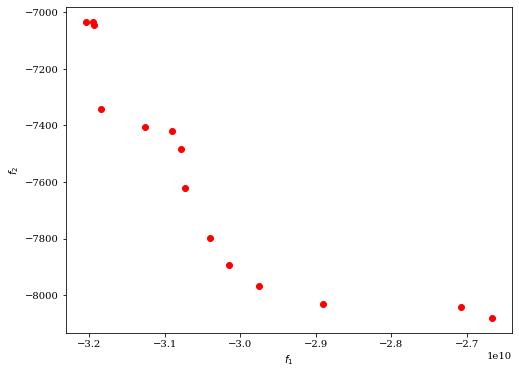

In [10]:
from pymoo.algorithms.nsga2 import NSGA2
algorithm = NSGA2(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True)
res_NSGA2 = minimize (problem, algorithm, Termination = ("n_gen", 90), seed = 1, verbose = False, save_history=True)
#print(res_NSGA2.F)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_NSGA2.F, color="red")
plot.show()

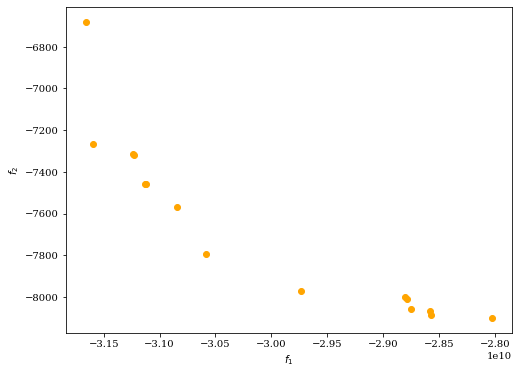

In [15]:
from pymoo.algorithms.rnsga2 import RNSGA2

ref_energy = get_reference_directions("energy", 2, 8, seed=1)
algorithm_energy = RNSGA2(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_points = ref_energy, epsilon=0.01,
                  normalization='front')
res_RNSGA2_energy = minimize (problem, algorithm_energy, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_RNSGA2_energy.F, color="Orange")
plot.show()

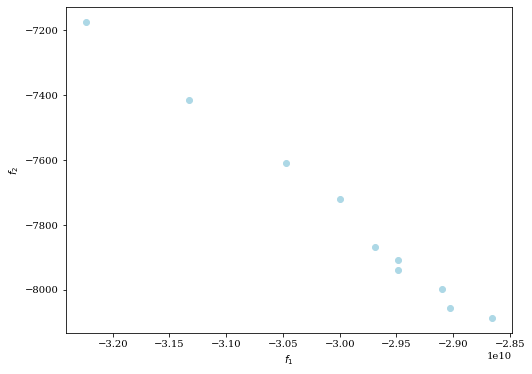

In [16]:
from pymoo.algorithms.nsga3 import NSGA3

ref_energy = get_reference_directions("energy", 2, 30, seed=1)
algorithm_energy = NSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_energy,
                  normalization='front')
res_NSGA3_energy = minimize (problem, algorithm_energy, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_NSGA3_energy.F, color="lightblue")
plot.show()

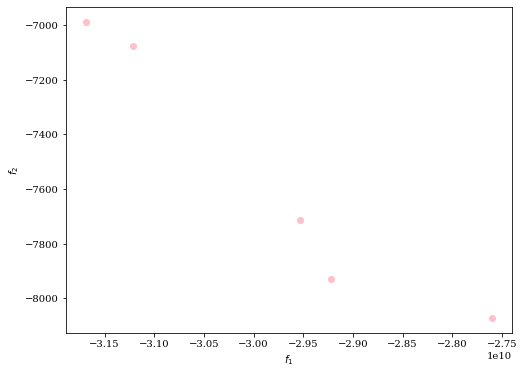

In [17]:
from pymoo.algorithms.unsga3 import UNSGA3

algorithm = UNSGA3(pop_size=100, sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_energy,
                  normalization='front')
res_UNSGA3_energy = minimize (problem, algorithm, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3_energy.F, color="pink")
plot.show()

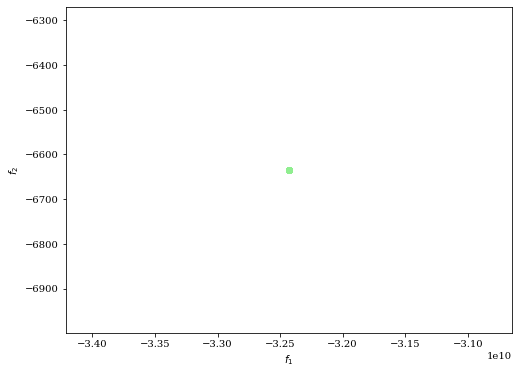

In [18]:
from pymoo.algorithms.moead import MOEAD
algorithm_energy = MOEAD(get_reference_directions("energy", 3,  100), 
                  n_neighbors=20,
                  decomposition="pbi",
                  prob_neighbor_mating=0.7,pop_size = 100,seed=1,sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),mutation=get_mutation("perm_inv"),eliminate_duplicates=True)
res_MOEAD_energy = minimize(problem, algorithm_energy, termination=('n_gen', 200), verbose = False, save_history=True)
plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plt.add(res_MOEAD_energy.F, color="lightgreen")
#plt.add(ref_points)
plt.show()

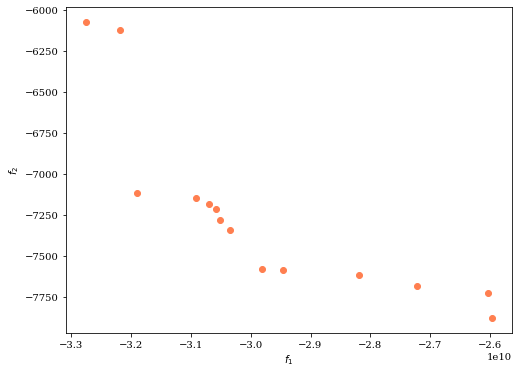

In [19]:
from pymoo.algorithms.ctaea import CTAEA

ref_dirs = get_reference_directions("energy", 2, 100)

algorithm = CTAEA(sampling=get_sampling("perm_random"),
                  crossover=get_crossover("perm_ox"),
                  mutation=get_mutation("perm_inv"),
                  eliminate_duplicates=True,
                  ref_dirs=ref_dirs)
res_CTAEA = minimize(problem, algorithm, termination=('n_gen', 200), verbose = False, save_history=True)
plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plt.add(res_CTAEA.F, color="coral")
#plt.add(ref_points)
plt.show()

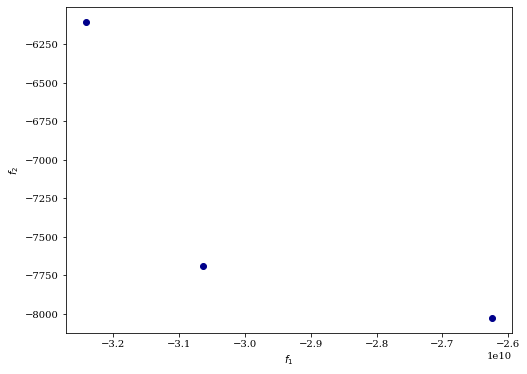

In [20]:
from pymoo.algorithms.rnsga3 import RNSGA3

ref_energy = get_reference_directions("energy", 2, 12)
algorithm_energy = RNSGA3(ref_points = ref_energy, pop_per_ref_point = 90,
                   sampling=get_sampling("perm_random"),
                   crossover=get_crossover("perm_ox"),
                   mutation=get_mutation("perm_inv"),
                   eliminate_duplicates=True)
res_energy =  minimize (problem, algorithm_energy, Termination = ("n_gen", 200), seed = 1, verbose = False, save_history=True)
plt = Scatter()
plt.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

plt.add(res_energy.F, color="darkblue")
#plt.add(ref_points)
plt.show()

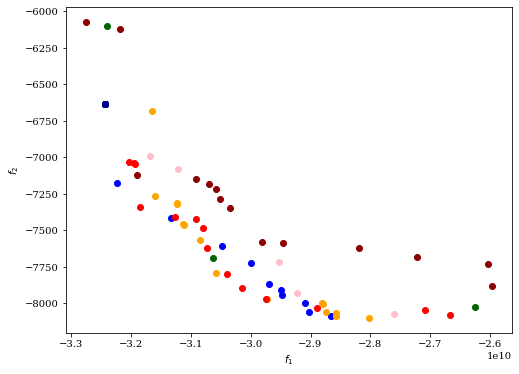

In [21]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res_UNSGA3_energy.F, color="pink", label="UNSGA3")
plot.add(res_NSGA3_energy.F, color="blue", label="NSGA3")
plot.add(res_RNSGA2_energy.F, color="Orange", label="RNSGA2")
plot.add(res_NSGA2.F, color="red", label="NSGA2")
plot.add(res_MOEAD_energy.F, color="darkblue", label="MOEAD")
plot.add(res_CTAEA.F, color="darkred", label="CTAEA")
plot.add(res_energy.F, color="darkgreen", label="RNSGA3")

plot.show()

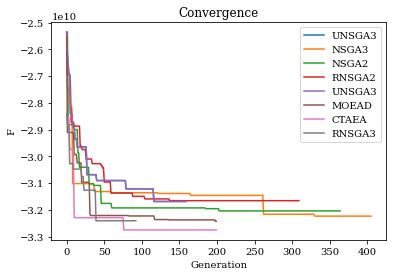

In [22]:

import matplotlib.pyplot as plt

ret_unsga3 = [np.min(e.pop.get("F")) for e in res_UNSGA3_energy.history]
ret_NSGA3 = [np.min(e.pop.get("F")) for e in res_NSGA3_energy.history]
ret_NSGA2 = [np.min(e.pop.get("F")) for e in res_NSGA2.history]
ret_RNSGA2 = [np.min(e.pop.get("F")) for e in res_RNSGA2_energy.history]
ret_unsga3 = [np.min(e.pop.get("F")) for e in res_UNSGA3_energy.history]
ret_MOEAD = [np.min(e.pop.get("F")) for e in res_MOEAD_energy.history]
ret_CTAEA = [np.min(e.pop.get("F")) for e in res_CTAEA.history]
ret_RNSGA3 = [np.min(e.pop.get("F")) for e in res_energy.history]

plt.plot(np.arange(len(ret_unsga3)), ret_unsga3, label="UNSGA3")
plt.plot(np.arange(len(ret_NSGA3)), ret_NSGA3, label="NSGA3")
plt.plot(np.arange(len(ret_NSGA2)), ret_NSGA2, label="NSGA2")
plt.plot(np.arange(len(ret_RNSGA2)), ret_RNSGA2, label="RNSGA2")
plt.plot(np.arange(len(ret_unsga3)), ret_unsga3, label="UNSGA3")
plt.plot(np.arange(len(ret_MOEAD)), ret_MOEAD, label="MOEAD")
plt.plot(np.arange(len(ret_CTAEA)), ret_CTAEA, label="CTAEA")
plt.plot(np.arange(len(ret_RNSGA3)), ret_RNSGA3, label="RNSGA3")

plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()